In [192]:
%matplotlib inline     
# ^Sans animations
#matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import random
import numpy as np
import matplotlib.colors

In [193]:
cmap = matplotlib.colors.ListedColormap(["#0099ff", "#d5d5c3"])

**Espèce menacée : la Baleine bleue**

In [194]:
class Baleine: #parametrage de la baleine
    def __init__(self,numero,age,sexe):
        self.numero=numero
        self.age=age
        self.sexe=sexe
        
    def __repr__(self):
        return "{numero} - {age} - {sexe}".format(numero=self.numero,
                                                 age=self.age,
                                                 sexe=self.sexe)
    
    def copy(self):
        return Baleine(self.numero,self.age,self.sexe)

In [195]:
#Dictionnaire de la distribution des baleines bleues
#Population de base réparti dans l'hémisphère sud PB population femelle Pf
Pb = 2300

#Population dans l'océan Atlantique A0
A0 = 920
#Population dans l'océan Pacifique P0
P0 = 1150
#Population dans l'ocean Indien I0
I0 = 230

n = 3 #nbdegeneration

#une génération dure 3 ans
#Il y a à peu près 2 enfants par générations par baleine


pop_init=[Baleine(x, # numero
                    int(random.randint(0,105)), # age 
                    random.choice(["F","M"])) #sexe
            for x in range(2300)]

In [196]:
population=pop_init

In [197]:
def mort_vieillesse(population): #parametrage des mamans baleines(["F","M"])) #sexe
    for x in range(2300):#des baleines mortes de vieillesse
        numero_mort=[] 
    for x in population:
        if int(x.age)>=100:
            numero_mort.append(x.numero)
    for i,b in enumerate(population):
        if b.numero in numero_mort:
            del population[i] #suppression des baleines mortes de population

    return population 

In [198]:
def mort_vieilles(population): #etablihoice(["F","M"])) #sexe
    for x in range(2300):#des baleines mortes de vieillesse
        numero_mort=[] 
    for x in population:
        if int(x.age)>=100:
            numero_mort.append(x.numero)
    return numero_mort

In [199]:
def reproduction(population):#selections des baleines aptes à procréer
    """
    
    """
    numero_mere=[]
    for x in population:
        if int(x.age)>=8 and int(x.age) <=75 and str(x.sexe)=='F':
            numero_mere.append(x.numero)
    if not numero_mere:
        return []
    max_numero = max([b.numero for b in population])#création de numero après num max
    
    pop_naissance = [Baleine(x,0, # age
                    random.choice(["F","M"])) for x in range(max_numero,max_numero+len(numero_mere)*2)]#naissance des nouveaux baleineaux + attribution de n°
    
    return pop_naissance
    

In [239]:
def mortAC(population):
    numero_mortAC=[] 
    for x in population:
        if np.random.random()<0.15:
            numero_mortAC.append(x.numero)
    return numero_mortAC

In [238]:
def mortRC(population,):#on cherche combien de baleines meurent à car cause du rechauffement climatique
    numero_mortRC=[] 
    for x in population:
        if np.random.random()<0.15:
            numero_mortRC.append(x.numero)
    return numero_mortRC# 

In [237]:
 def mortCB(population,):#on cherche combien de baleines meurent à car cause du rechauffement climatique
    numero_mortCB=[] 
    for x in population:
        if np.random.random()<0.6:
            numero_mortCB.append(x.numero)
    return numero_mortCB

In [236]:
def impact_somme(population,):#on cherche combien de baleines meurent à car cause du rechauffement climatique
    numero_mortCB=[] 
    numero_mortRC=[] 
    numero_mortAC=[] 
    
    for x in population:
        if np.random.random()<0.6:
            numero_mortCB.append(x.numero)
        elif np.random.random()<0.15:
            numero_mortAC.append(x.numero)
        elif np.random.random()<0.15:
            numero_mortRC.append(x.numero)
    nombre_tuées_humains=numero_mortCB+numero_mortRC+numero_mortAC
    return nombre_tuées_humains

In [219]:
p = {1 : 0.7,
     2 : 0.15,
     3 : 0.15,} # risques des dangers
np.testing.assert_almost_equal(sum(p.values()),1)
def mort_impact_humain(population):#somme totale des baleines mortes par impacts humains
    numero_mort_IC = []
    numero_mort_IC += mortAC(population)#nombre de morts par acidification des océans
    numero_mort_IC += mortCB(population)#nombre de morts par chasse baleinière
    numero_mort_IC += mortRC(population)#nombre de morts par réchauffement climatique 
    numero_mort_IC = set(numero_mort_IC)#ensemble pour éviter les doublons (ex: mort par vieillesse mais aussi impacts humains)
    for i,b in enumerate(population):#suppression de toutes les baleines mortes 
        if b.numero in numero_mort_IC:
            del population[i]
    return population
    

In [361]:
def update_population(population):#nouvelle population < ancienne
    # 1. mort de veillesse
    # 2. mort RC+AC+BC
    # 3. Naissance
    pop = [b.copy() for b in population]
    new_population = mort_vieillesse(pop)
    new_population = mort_impact_humain(new_population)
    new_population += reproduction(new_population)
    return new_population

In [362]:
def population_n_generations(pop_init,n):
    """
     int*dict[int:float]*int->list[int]
     ...
    """
    l= [pop_init]
    E = pop_init
    for i in range(0,n):
        E = update_population(E)
        l.append(E)
    return l
 

In [363]:
pop_i1=[Baleine(x, # numero
                    int(random.randint(0,105)), # age 
                    random.choice(["F","M"])) #sexe
        for x in range(920)]
popile = population_n_generations(pop_i1,10)
for p in pop_i1:
    print(p)

0 - 23 - F
1 - 14 - F
2 - 70 - M
3 - 99 - F
4 - 4 - F
5 - 72 - F
6 - 2 - F
7 - 75 - F
8 - 58 - M
9 - 28 - M
10 - 28 - F
11 - 50 - M
12 - 5 - M
13 - 22 - F
14 - 63 - F
15 - 15 - M
16 - 38 - M
17 - 49 - M
18 - 1 - M
19 - 20 - M
20 - 3 - F
21 - 22 - M
22 - 37 - F
23 - 9 - M
24 - 65 - F
25 - 4 - M
26 - 38 - M
27 - 86 - M
28 - 19 - F
29 - 102 - F
30 - 5 - M
31 - 41 - F
32 - 76 - F
33 - 44 - M
34 - 52 - F
35 - 0 - M
36 - 40 - F
37 - 72 - M
38 - 63 - M
39 - 70 - M
40 - 71 - F
41 - 4 - M
42 - 21 - M
43 - 30 - M
44 - 35 - F
45 - 80 - F
46 - 38 - F
47 - 23 - F
48 - 60 - M
49 - 72 - F
50 - 104 - F
51 - 29 - M
52 - 46 - F
53 - 40 - M
54 - 98 - M
55 - 87 - F
56 - 67 - F
57 - 88 - F
58 - 31 - M
59 - 101 - M
60 - 90 - F
61 - 83 - M
62 - 28 - M
63 - 58 - M
64 - 6 - M
65 - 21 - F
66 - 72 - F
67 - 90 - M
68 - 2 - F
69 - 95 - M
70 - 15 - M
71 - 41 - F
72 - 9 - F
73 - 37 - M
74 - 9 - M
75 - 47 - M
76 - 56 - F
77 - 93 - M
78 - 99 - M
79 - 28 - F
80 - 48 - F
81 - 57 - F
82 - 88 - F
83 - 60 - F
84 - 65 - F
8

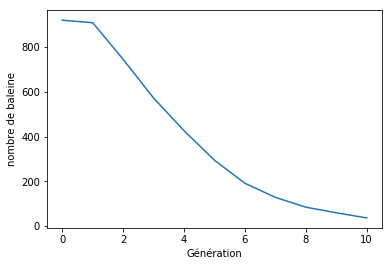

In [364]:
def plot_I1(L):
    '''
    ??-> None
    Visualise the evolution of the population in 'L'
    '''

    plt.figure()
    plt.plot([len(b) for b in L],)
    plt.ylabel("nombre de baleine")
    plt.xlabel("Génération")
    plt.show()
    return
plot_I1(popile)

In [365]:
pop_i2=[Baleine(x, # numero
                    int(random.randint(0,105)), # age 
                    random.choice(["F","M"])) #sexe
            for x in range(1150)]

In [366]:
popile2 = population_n_generations(pop_i2,10)
for p in pop_i2:
    print(p)

0 - 89 - M
1 - 66 - F
2 - 77 - F
3 - 4 - F
4 - 29 - M
5 - 85 - M
6 - 91 - F
7 - 93 - F
8 - 90 - M
9 - 76 - M
10 - 64 - F
11 - 103 - M
12 - 30 - F
13 - 21 - M
14 - 50 - M
15 - 4 - F
16 - 7 - F
17 - 98 - M
18 - 20 - M
19 - 65 - M
20 - 58 - M
21 - 10 - M
22 - 34 - M
23 - 68 - F
24 - 39 - F
25 - 49 - M
26 - 18 - F
27 - 47 - M
28 - 74 - M
29 - 85 - M
30 - 57 - M
31 - 88 - F
32 - 38 - F
33 - 101 - M
34 - 69 - M
35 - 89 - F
36 - 12 - M
37 - 101 - M
38 - 78 - M
39 - 67 - M
40 - 89 - F
41 - 62 - F
42 - 91 - F
43 - 96 - F
44 - 54 - F
45 - 61 - M
46 - 101 - M
47 - 5 - M
48 - 52 - M
49 - 4 - M
50 - 28 - F
51 - 104 - F
52 - 65 - F
53 - 3 - M
54 - 56 - M
55 - 83 - F
56 - 9 - M
57 - 82 - F
58 - 95 - M
59 - 97 - M
60 - 12 - F
61 - 21 - M
62 - 2 - F
63 - 69 - F
64 - 68 - M
65 - 72 - M
66 - 1 - M
67 - 9 - F
68 - 96 - M
69 - 3 - F
70 - 89 - M
71 - 40 - M
72 - 73 - F
73 - 36 - F
74 - 14 - F
75 - 78 - M
76 - 68 - F
77 - 17 - M
78 - 53 - F
79 - 39 - M
80 - 67 - F
81 - 59 - M
82 - 105 - M
83 - 105 - M
84 - 1

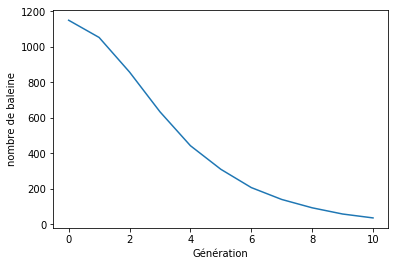

In [367]:
def plot_I2(L):
    '''
    ??-> None
    Visualise the evolution of the population in 'L'
    '''

    plt.figure()
    plt.plot([len(b) for b in L])
    plt.ylabel("nombre de baleine")
    plt.xlabel("Génération")
    plt.show()
    return
plot_I2(popile2)

In [368]:
pop_i3=[Baleine(x, # numero
                    int(random.randint(0,105)), # age 
                    random.choice(["F","M"])) #sexe
            for x in range(230)]

In [369]:
popile3 = population_n_generations(pop_i3,10)
for p in pop_i3:
    print(p)

0 - 39 - F
1 - 56 - F
2 - 84 - M
3 - 105 - F
4 - 56 - F
5 - 32 - F
6 - 104 - F
7 - 78 - M
8 - 41 - M
9 - 45 - F
10 - 92 - M
11 - 71 - F
12 - 27 - M
13 - 14 - F
14 - 60 - F
15 - 53 - M
16 - 90 - M
17 - 93 - F
18 - 32 - F
19 - 15 - M
20 - 32 - F
21 - 81 - F
22 - 10 - F
23 - 81 - M
24 - 69 - F
25 - 62 - F
26 - 67 - M
27 - 61 - M
28 - 29 - M
29 - 14 - F
30 - 40 - F
31 - 8 - M
32 - 12 - M
33 - 102 - F
34 - 46 - M
35 - 77 - F
36 - 94 - M
37 - 79 - F
38 - 71 - M
39 - 1 - M
40 - 98 - M
41 - 97 - F
42 - 94 - M
43 - 11 - M
44 - 63 - M
45 - 72 - M
46 - 55 - M
47 - 5 - M
48 - 85 - F
49 - 82 - F
50 - 89 - M
51 - 22 - M
52 - 80 - F
53 - 15 - F
54 - 65 - F
55 - 8 - M
56 - 22 - F
57 - 41 - M
58 - 98 - M
59 - 4 - F
60 - 50 - M
61 - 90 - M
62 - 82 - F
63 - 36 - M
64 - 87 - M
65 - 60 - M
66 - 39 - F
67 - 25 - M
68 - 83 - F
69 - 15 - M
70 - 100 - F
71 - 37 - M
72 - 34 - M
73 - 16 - M
74 - 54 - F
75 - 4 - F
76 - 60 - F
77 - 76 - F
78 - 39 - F
79 - 96 - M
80 - 39 - F
81 - 6 - M
82 - 9 - F
83 - 30 - F
84 - 3

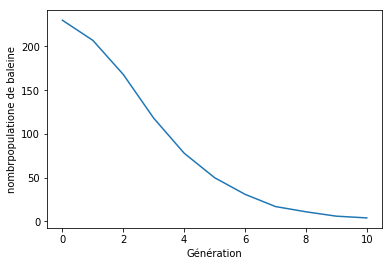

In [370]:
def plot_I3(L):
    '''
    ??-> None
    Visualise the evolution of the population in 'L'
    '''

    plt.figure()
    plt.plot([len(b) for b in L])
    plt.ylabel("nombrpopulatione de baleine")
    plt.xlabel("Génération")
    plt.show()
    return
plot_I3(popile3)

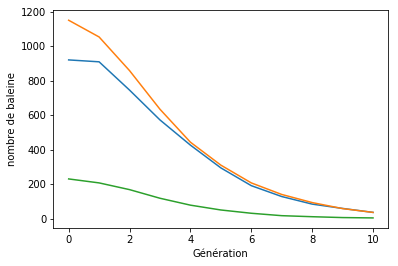

In [371]:
def all_plot(F,N,Z):
    plt.figure()
    plt.plot([len(b) for b in F],)
    plt.plot([len(b) for b in N], )
    plt.plot([len(b) for b in Z],)
    plt.ylabel("nombre de baleine")
    plt.xlabel("Génération")
    plt.show()
    return
all_plot(popile,popile2,popile3)
    

In [372]:
tuéé=len(impact_somme(population)+mort_vieilles(population))

In [373]:
A = np.zeros((23,100))

In [374]:
def matrice_bal(tuéé, A):
    i= np.random.randint(23)
    j= np.random.randint(100) 
    for f in range(tuéé):
        while A[i,j] != 0.:
            i= np.random.randint(23)
            j= np.random.randint(100)
        A[i,j]=1.
    return A
    
    
    
    
    
    
    
    
    

In [375]:
matrice_bal(tuéé, A)

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [376]:
def liste_mort_generation(population):
    fr=impact_somme(population,)
    fr+=mort_vieilles(population)
    return len(fr)
    
    

In [377]:
def liste_mort_generation2(population):
    gr=[]
    while len(population) !=0:
        gr.append(liste_mort_generation(population))
        population=mort_impact_humain(population)
        population=mort_vieillesse(population)
    return gr

In [378]:
liste_mort_generation2(population)

[1796, 915, 541, 311, 181, 97, 63, 37, 18, 13, 5, 2, 3, 1]

In [379]:
numero_mere=reproduction(population)

In [380]:
numero_mere

[]

In [381]:
len (numero_mere)

0

Premier bilan: Sans les impacts humains les baleines ne sont pas en voie de disparition car au bout de n generations il y aura toujours plus de baleines qui naissent que de baleines qui meurent

Actions humaines affectant la reproduction des baleines

- chasses baleiniere commerciales[1]

- conditions/rechauffement climatique [2]

- acidification des océans[3]


In [382]:
#dictionnaire representant la distribution des dangers pour la baleine
#clef=probabilité du danger
p={1:0.6,
   2:0.15,  
   3:0.15}

In [383]:
p

{1: 0.6, 2: 0.15, 3: 0.15}

In [384]:
numero_mortRC=mortRC(population)

In [385]:
len(numero_mortRC)

0

In [386]:
len(population)

0

In [387]:
numero_mortCB=mortCB(population)

In [388]:
numero_mortCB

[]

In [389]:
len(numero_mortCB)

0

In [390]:
numero_mortAC=mortAC(population)

In [391]:
numero_mortAC

[]

In [392]:
len(numero_mortAC)

0

In [393]:
len(numero_mortRC)+len(numero_mortAC)+len(numero_mortCB)#nombre de mort par les impacts humains

0

In [394]:
len(numero_mortRC)+len(numero_mortAC)+len(numero_mortCB)+len(numero_mort)#nombre de mort total sur 2300 baleines

NameError: name 'numero_mort' is not defined

 pour une generation il y moins de naissance que de deces cela montre l'importance des actes humains sur l'extinctions des baleines

In [400]:
#Nous utiliserons les paramètres suivants.

p = {'A0' : 0.5,
    'I0' : 0.4,
    'P0' : 0.8} # PROBABILITÉ DE MOUVEMENT DES BALEINES 

m = {('A0','P0') : 0.2, # Migration ratio from island 'A0' to island 'P0'
     ('P0','A0') : 0.2,
     ('I0','A0') : 0.05,
     ('A0','I0') : 0.05,
     ('P0','I0') : 0.01,
     ('I0','P0') : 0.01}

In [401]:
def generation_variante2():
    p_new={}
    p_new['A0'] = p['A0']*(1-2*m)+p['IO']*m+p['P0']*m
    p_new['I0'] = p['I0']*(1-2*m)+p['A0']*m+p['P0']*m
    p_new['P0'] = p['P0']*(1-2*m)+p['I0']*m+p['A0']*m
    return p_new

In [ ]:
def migration()